# Baseball Case Study

#### <u>Problem Statement</u>: 
<div style="text-align: justify"> 
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
</div>

   * Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

   * Output: Number of predicted wins (W)

In [1]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This is a <font color = red>linear regression problem</font> where we need to predict the number of wins (W)

In [4]:
# Checking for the shape and the datatypes of the elements of the dataset
print(df.shape)
df.info()

(30, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 17 columns inclusive of the target column,none of the columns have missing values

In [5]:
# Confirming missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# 2. EDA

In [6]:
# plotting the histograms of each column to visualize its distribution
# splitting the data in a independent and target variable

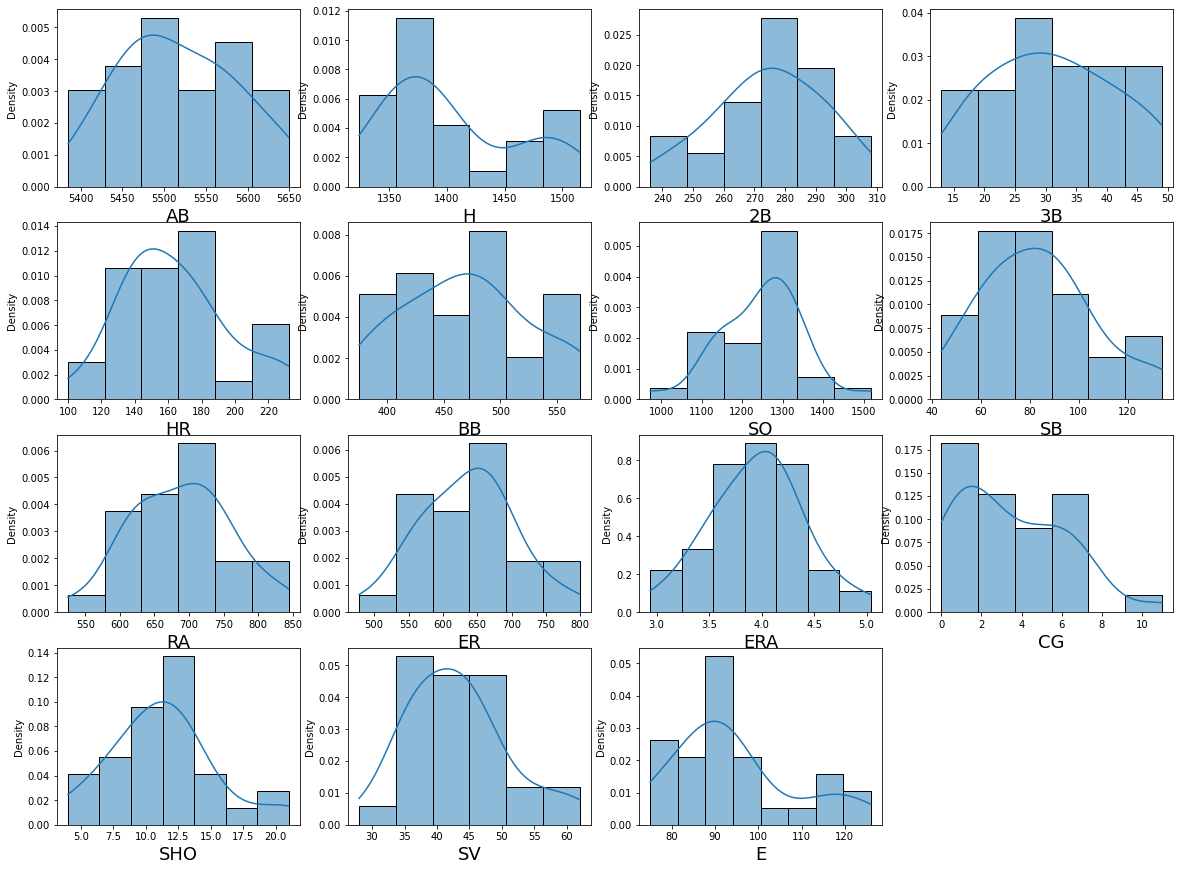

In [7]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in df.columns[2:]:
    if plotnumber<17:
        plt.subplot(4,4,plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

The data is generally normally distributed except for the column 'H','CG' and 'E' hence we can use the log transformation to make it more normally distributed

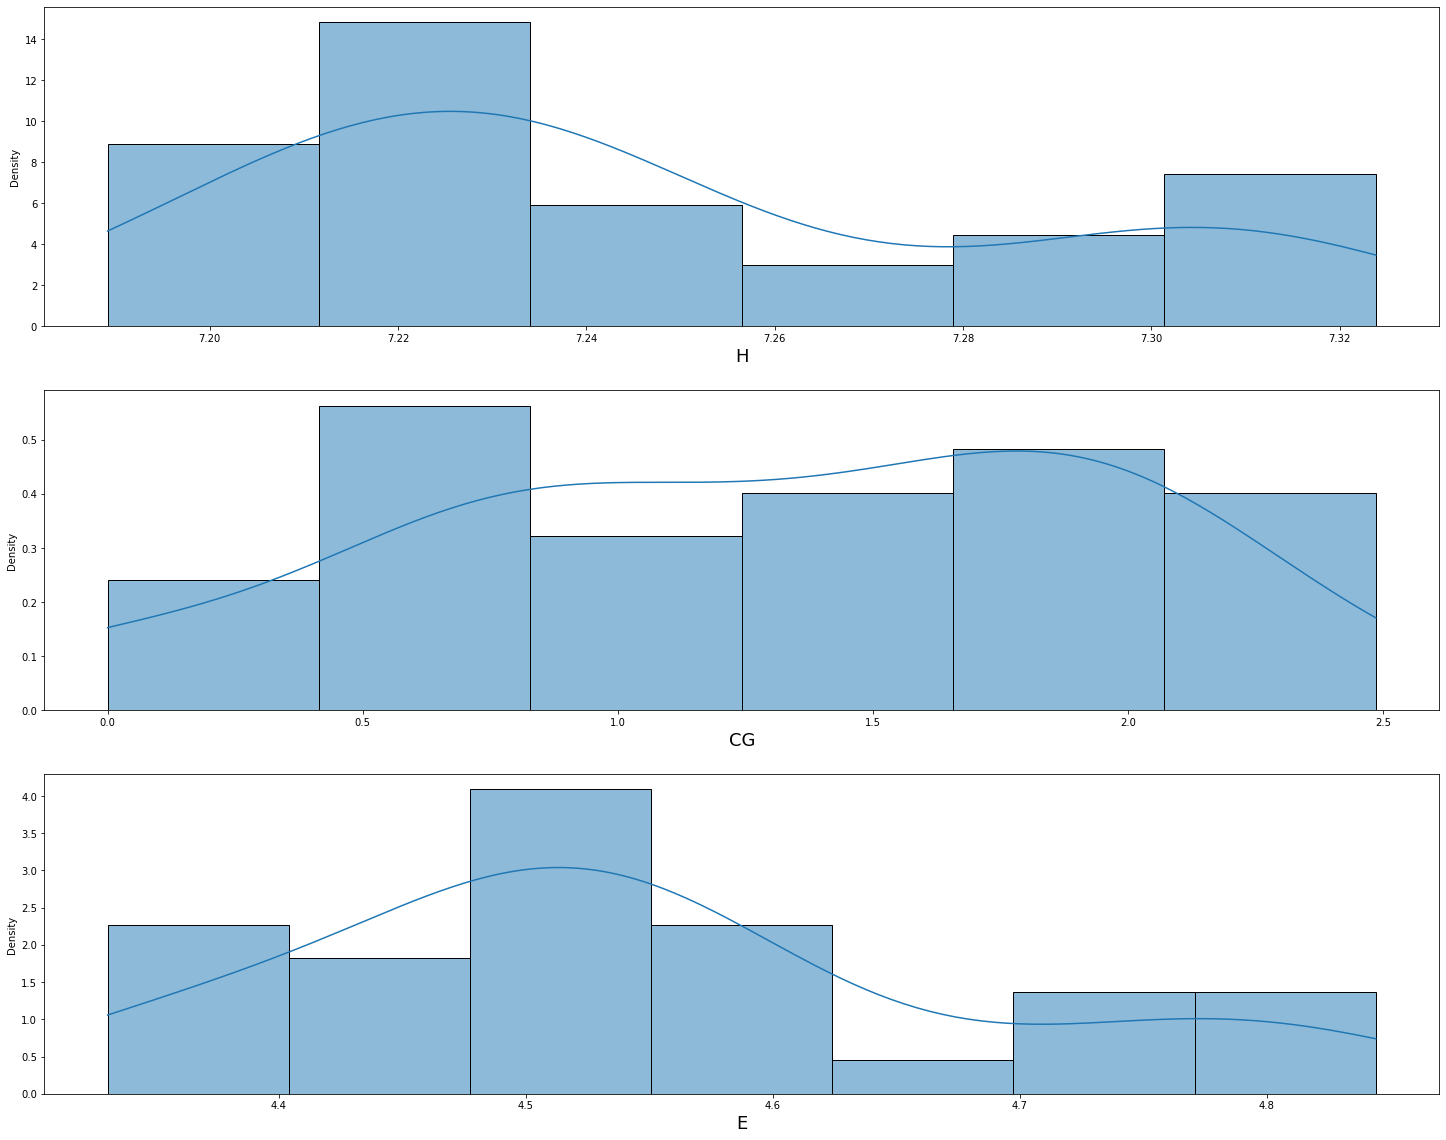

In [8]:
log_transform_features = ['H', 'CG', 'E']
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in log_transform_features:
    plt.subplot(3,1,plotnumber)
    x = np.log1p(df[col])
    df[col] = x
    sns.histplot(df[col], kde = True, stat = 'density')
    plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

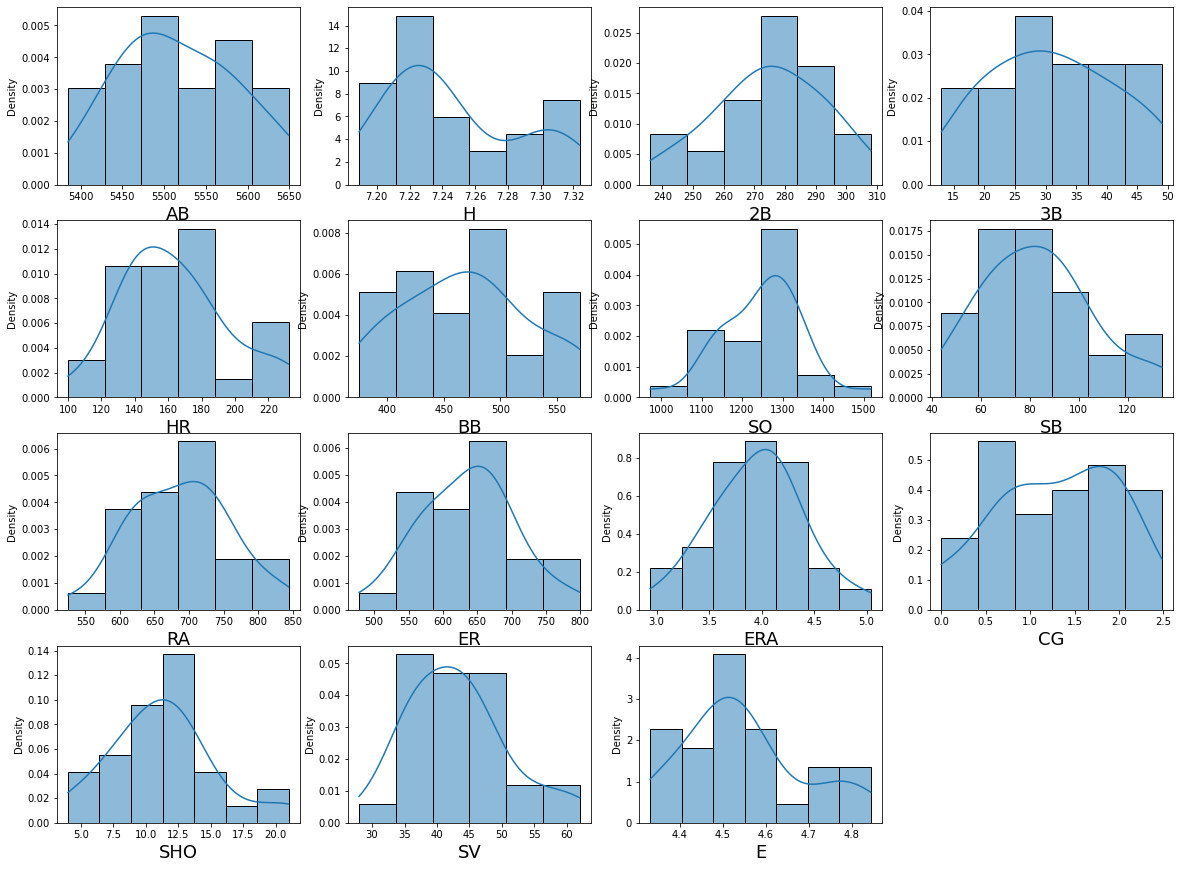

In [9]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in df.columns[2:]:
    if plotnumber<17:
        plt.subplot(4,4,plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [10]:
y = df['W']
x = df.drop('W', axis = 1)

In [11]:
# Checking for the linear correlation bertween the variables and the target variable
temp = pd.DataFrame()
score= []
pvalue=[]
feature = []

for col in x.columns:
    score.append(pearsonr(x[col],y)[0])
    pvalue.append(pearsonr(x[col],y)[1])
    feature.append(col)

temp['feature']= feature
temp['score'] = score
temp['pvalue']= pvalue


In [12]:
temp[temp['pvalue']<0.05].sort_values('score')

,feature,score,pvalue
11,ERA,-0.819600,3.027199e-08
9,RA,-0.812952,4.808611e-08
10,ER,-0.809435,6.097957e-08
3,2B,0.427797,1.836329e-02
0,R,0.430751,1.748813e-02
13,SHO,0.471805,8.484266e-03
6,BB,0.484342,6.683839e-03
14,SV,0.666530,5.784065e-05


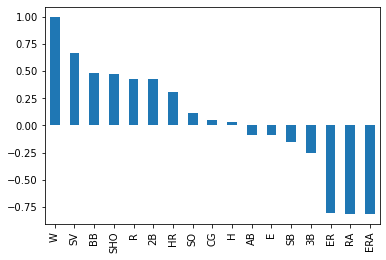

In [13]:
df.corr()['W'].sort_values(ascending = False).plot.bar()
plt.show()

from the above observations of the correlation coefficient and the pvalue, many of the features correlate well with target variable however their significance is higher than 0.05. Hence the null hypothesis holds true and hence we cannot establish a linear correlation between those features and the target variable <br>

Before dropping those features we check to see if there is a feature feature correlation between any two features

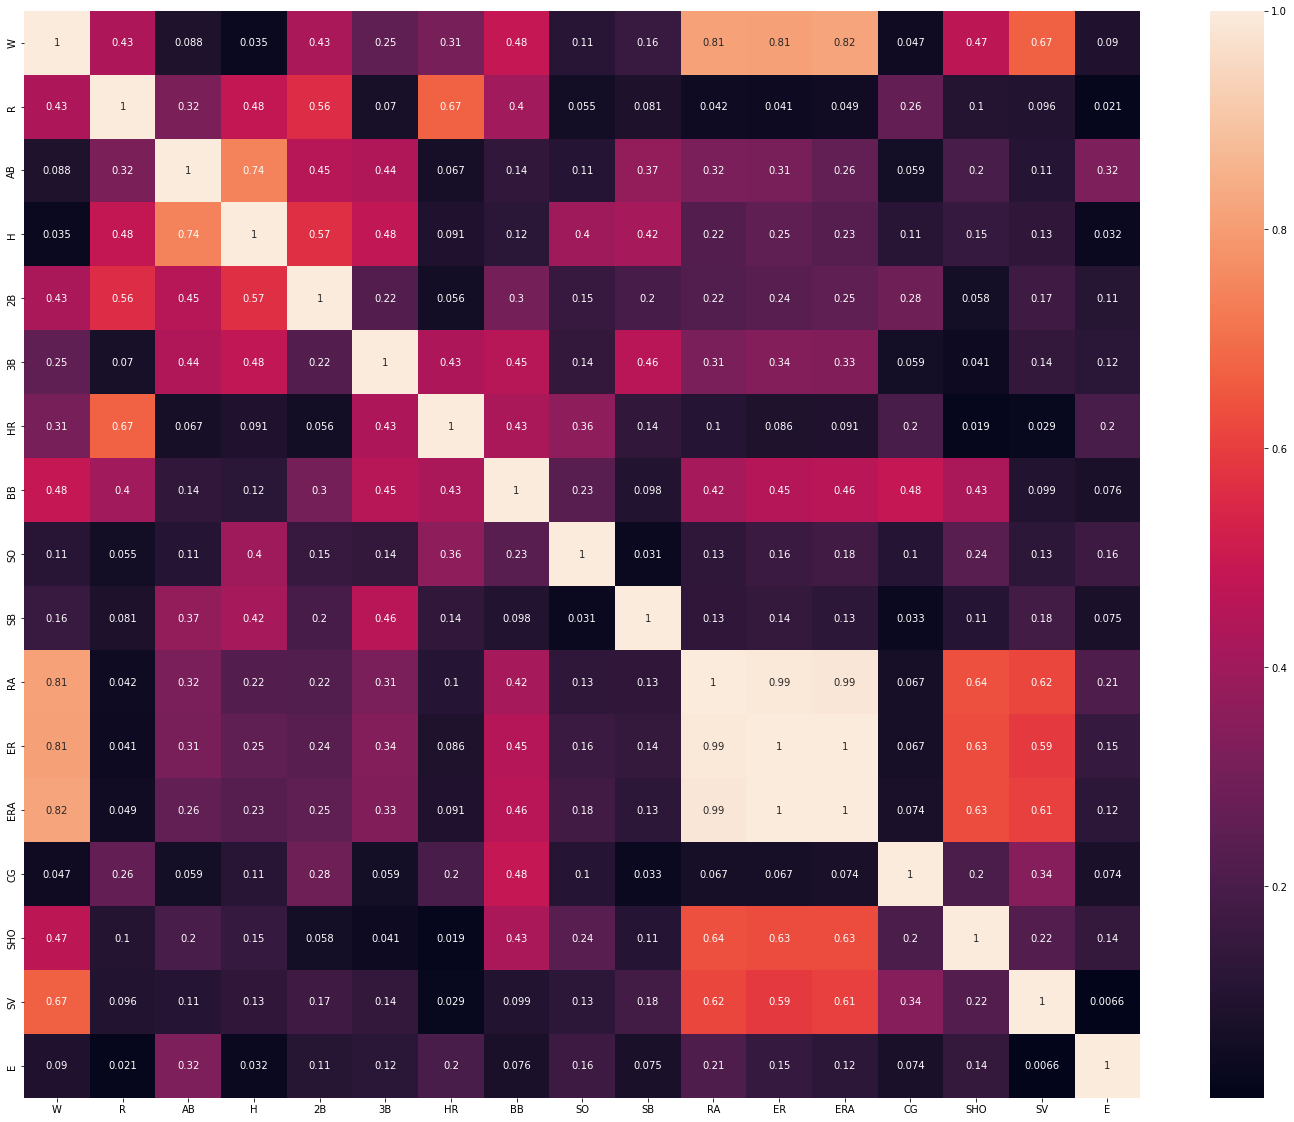

In [14]:
plt.figure(figsize = (25, 20))
sns.heatmap(np.abs(df.corr()), annot = True)
plt.show()

a strong correlation is observed between the Earned Runs, Earned Runs average and the Runs allowed. These features increase the redundancy and increase the dimensionality, therefore we can drop a few features. However, we will first further clean the date before feature selection

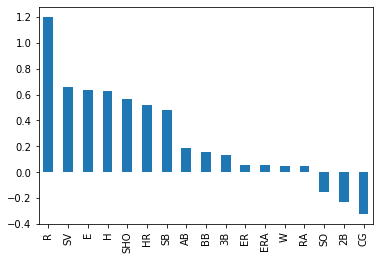

In [15]:
df.skew().sort_values(ascending = False).plot.bar()
plt.show()

Many of the features seem to positively skewed and we can attempt to reduce the skewness using either the interquantile range or the zscore

In [16]:
df2 = df.copy()

In [17]:
for col in x.columns[2:]:
    lq = df2[col].quantile(0.25)
    hq = df2[col].quantile(0.75)
    iqr = (hq - lq)
    upper_bound = hq + 1.5 * iqr
    lower_bound = lq - 1.5 * iqr
    lower_indices = np.where(df2[col] < lower_bound)
    upper_indices = np.where(df2[col] > upper_bound)
    
    df2.drop(index = lower_indices[0], inplace = True)
    df2.drop(index = upper_indices[0], inplace = True)

In [18]:
df2.shape

(21, 17)

<AxesSubplot:>

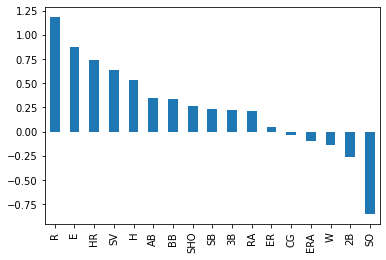

In [19]:
df2.skew().sort_values(ascending = False).plot.bar()


Apparently the skewness increases when attempting to remove the outliers using the interquantile range, hence we can attempt using the log transform on all the cols

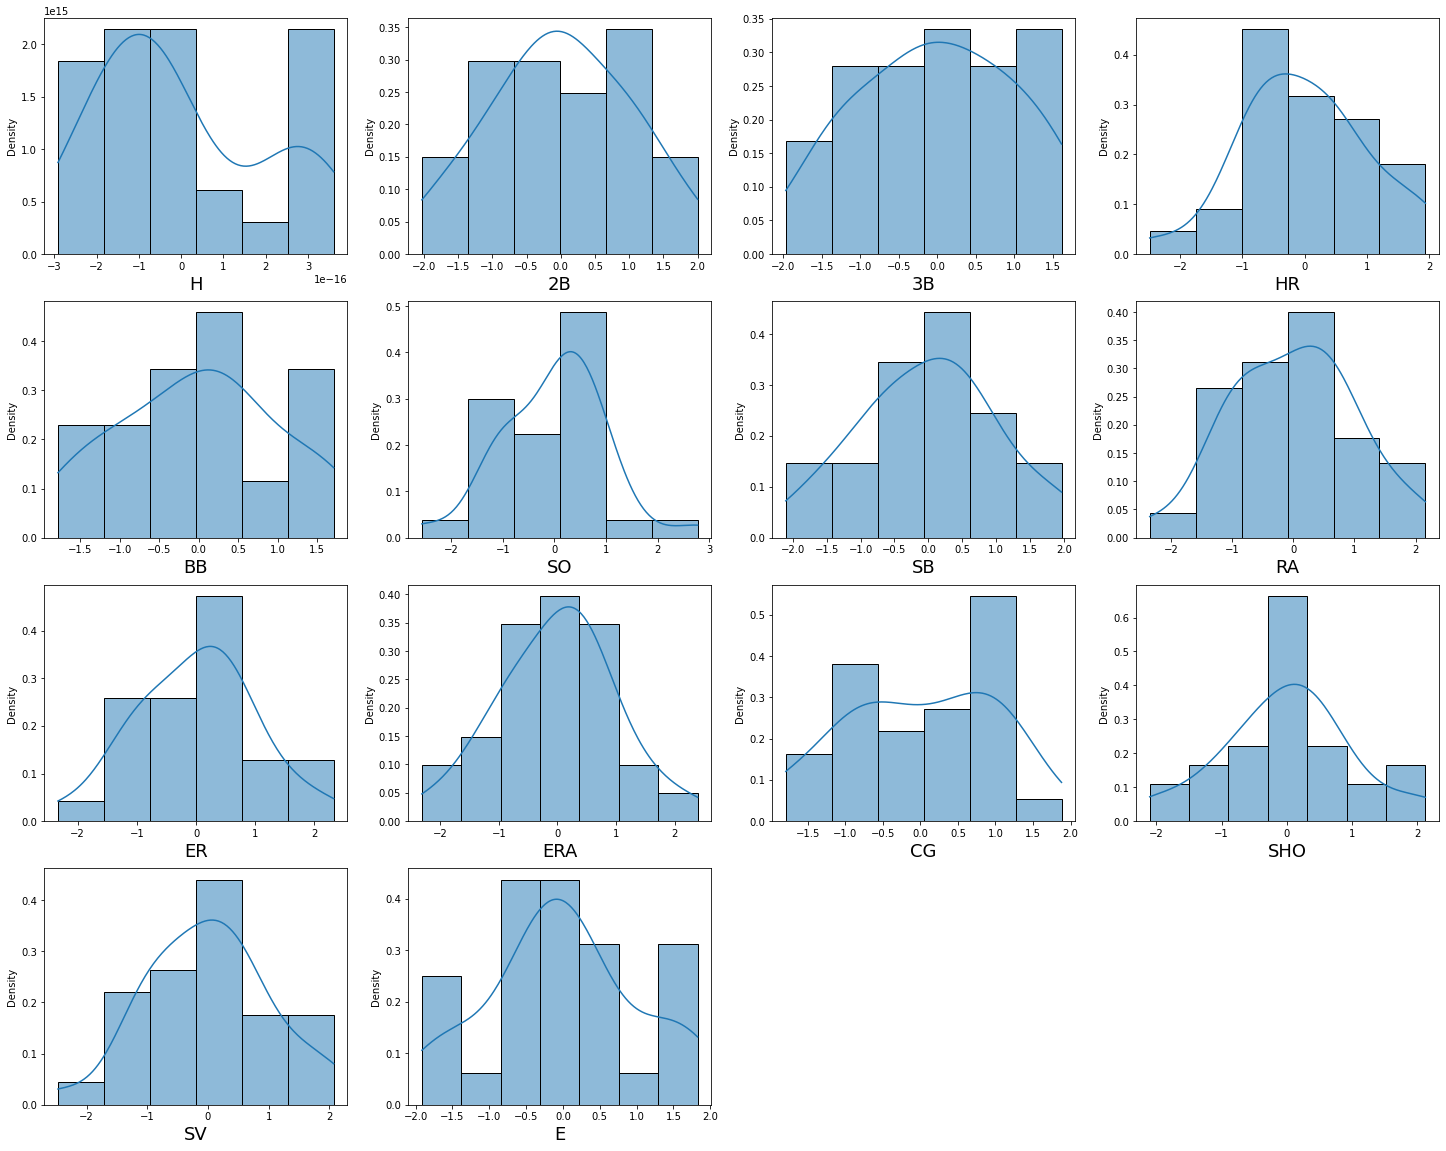

In [20]:
plt.figure(figsize = (25, 20))
plotnumber = 1

from sklearn.preprocessing import PowerTransformer

for col in df.columns[3:]:
    plt.subplot(4,4,plotnumber)
    x = PowerTransformer().fit_transform(df[[col]])
    df[col] = x
    sns.histplot(df[col], kde = True, stat = 'density')
    plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

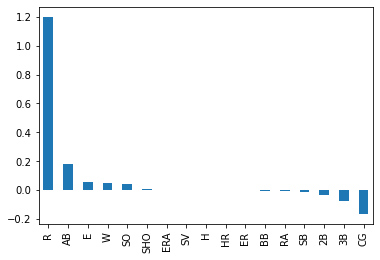

In [21]:
df.skew().sort_values(ascending = False).plot.bar()
plt.show()

The skewness is dramatically reduced using the PowerTransformer, however the column 'AB' has all its values turned to zero hence we replace it with the old values. Also column 'R' has quite a few outliers and we drop it entirely.

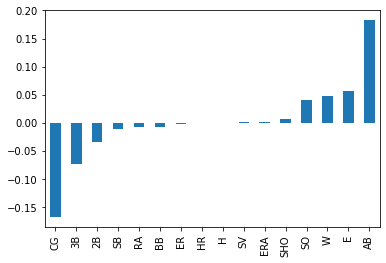

In [28]:
df.drop('R', axis = 1, inplace = True)
df.skew().sort_values().plot.bar()
plt.show()

The skewness is quite acceptable now

# Model Training

In [29]:
# split the dataset in the training variables and target variable
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [30]:
# Standardize the data
x_standardized = StandardScaler().fit_transform(x)

In [31]:
# split the dataset into a training and testing set
xtrain, xtest, ytrain, ytest = train_test_split(x_standardized,y,test_size = 0.25, random_state = 42)

In [32]:
estimators = []

lr = LinearRegression()
estimators.append(('Linear Regressor',lr))
dt = DecisionTreeRegressor()
estimators.append(('Decision Tree Regressor',dt))
kn = KNeighborsRegressor()
estimators.append(('K-Neighbors Regressor',kn))

In [35]:
# fit the estimators 
for estimator in estimators:
    estimator[1].fit(xtrain, ytrain)
    ypred = estimator[1].predict(xtest)
    print(estimator[0])
    print(f'{mean_squared_error(ypred, ytest,squared = False):0.3f}')
    print(f'{r2_score(ypred, ytest):0.3f}')

Linear Regressor
6.109
0.817
Decision Tree Regressor
11.192
0.157
K-Neighbors Regressor
8.073
-1.551


The linear regression model is found to have smallest mean squared error and also high r2 coeffcient. We can attempt to fine tune the linear regression model in order to find a better estimate

In [1]:
# using LassoCV to find better parameters for the Linear Regression
from sklearn.linear_model import LassoCV
lcv = LassoCV()
lcv.fit(xtrain, ytrain)
ypred2 = lcv.predict(xtest)
print(f'{mean_squared_error(ypred2, ytest, squared = False):0.3f}')
print(f'{r2_score(ytest, ypred2):0.3f}')

NameError: name 'xtrain' is not defined

In [51]:
# Using Elastic Net regularization
from sklearn.linear_model import ElasticNetCV
ecv = ElasticNetCV()
ecv.fit(xtrain, ytrain)
ypred3 = ecv.predict(xtest)
print(f'{mean_squared_error(ytest, ypred3, squared = False):0.3f}')
print(f'{r2_score(ytest, ypred3):0.3f}')

5.739
0.778


In [52]:
# Using L2 regularization
from sklearn.linear_model import RidgeCV
rcv = RidgeCV()
rcv.fit(xtrain, ytrain)
ypred4 = rcv.predict(xtest)
print(f'{mean_squared_error(ytest, ypred4, squared = False):0.3f}')
print(f'{r2_score(ytest, ypred4):0.3f}')

5.614
0.788


<font color = green>
The linear regression regularized using the RidgeCV gives the lowest error and highest R2 score even compared to other Regression models. Hence it will be selected
</font>

In [56]:
# saving the model
import joblib
joblib.dump(rcv, 'L2_regularized_linear_model.pkl')

['L2_regularized_linear_model.pkl']